# Exploratory Data Analysis for online sales 

### data fetching

In [1]:
import pandas as pd
retail_df = pd.read_excel(io='online_retail_II.xlsx')

In [2]:
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
# Create a copy of the original data to avoid modifying the fetched data directly.
retail_sp = retail_df.copy()

Since the analysis focuses on customers, check for missing values in Customer ID

In [4]:
retail_sp['Customer ID'].isna().sum()

107927

In [5]:
retail_sp[retail_sp['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [6]:
# Remove rows where Customer ID is NaN, Description is NaN, and Price is 0, as they are considered incorrectly recorded data.
retail_sp = retail_sp[~((retail_sp['Customer ID'].isna()) & (retail_sp['Description'].isna()) & (retail_sp['Price']==0))]

# Assign -1 to Customer ID for other cases, considering them as guest purchases or canceled transactions.
retail_sp['Customer ID'] = retail_sp['Customer ID'].fillna(-1)

Check the data types of all columns

In [7]:
retail_sp.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [8]:
# Convert 'Customer ID' to integer type
retail_sp['Customer ID'] = retail_sp['Customer ID'].astype(int)

Check dataset

In [9]:
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


### Purchase trend analysis

In [10]:
# Extract necessary columns for purchase trend analysis
purchase_trend_df = retail_sp[['Customer ID', 'Invoice', 'Description', 'Quantity', 'Price', 'Country', 'InvoiceDate', ]].copy()

In [11]:
# Separate Date and Time columns
import datetime as dt
purchase_trend_df['InvoiceTime'] = purchase_trend_df['InvoiceDate'].dt.time
purchase_trend_df['InvoiceDate'] = purchase_trend_df['InvoiceDate'].dt.date

In [12]:
# Create new column: sales amount = quantity * price
purchase_trend_df.loc[:, 'SalesAmount'] = purchase_trend_df['Quantity'] * purchase_trend_df['Price']

In [13]:
purchase_trend_df

,Customer ID,Invoice,Description,Quantity,Price,Country,InvoiceDate,InvoiceTime,SalesAmount
0,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,2009-12-01,07:45:00,83.40
1,13085,489434,PINK CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01,07:45:00,81.00
2,13085,489434,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,2009-12-01,07:45:00,81.00
3,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,2009-12-01,07:45:00,100.80
4,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,2009-12-01,07:45:00,30.00
...,...,...,...,...,...,...,...,...,...
525456,17530,538171,FELTCRAFT DOLL ROSIE,2,2.95,United Kingdom,2010-12-09,20:01:00,5.90
525457,17530,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,United Kingdom,2010-12-09,20:01:00,3.75
525458,17530,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,United Kingdom,2010-12-09,20:01:00,3.75
525459,17530,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,United Kingdom,2010-12-09,20:01:00,7.50


##### Daily purchase trend

In [14]:
daily_purchase_trend = purchase_trend_df.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
daily_purchase_trend = daily_purchase_trend.rename(columns={'Invoice': 'Transactions'})
daily_purchase_trend

,Quantity,Price,SalesAmount,Transactions
InvoiceDate,,,,
2009-12-01,23886,4.487745,53173.03,3220
2009-12-02,30923,4.097757,62763.59,3273
2009-12-03,44569,4.438961,68093.05,2994
2009-12-04,21219,3.791499,40346.40,2555
2009-12-05,5119,3.608150,9803.05,400
...,...,...,...,...
2010-12-05,16395,2.896576,31383.95,2725
2010-12-06,21398,4.570522,53860.18,3868
2010-12-07,25261,28.816274,45059.05,2955


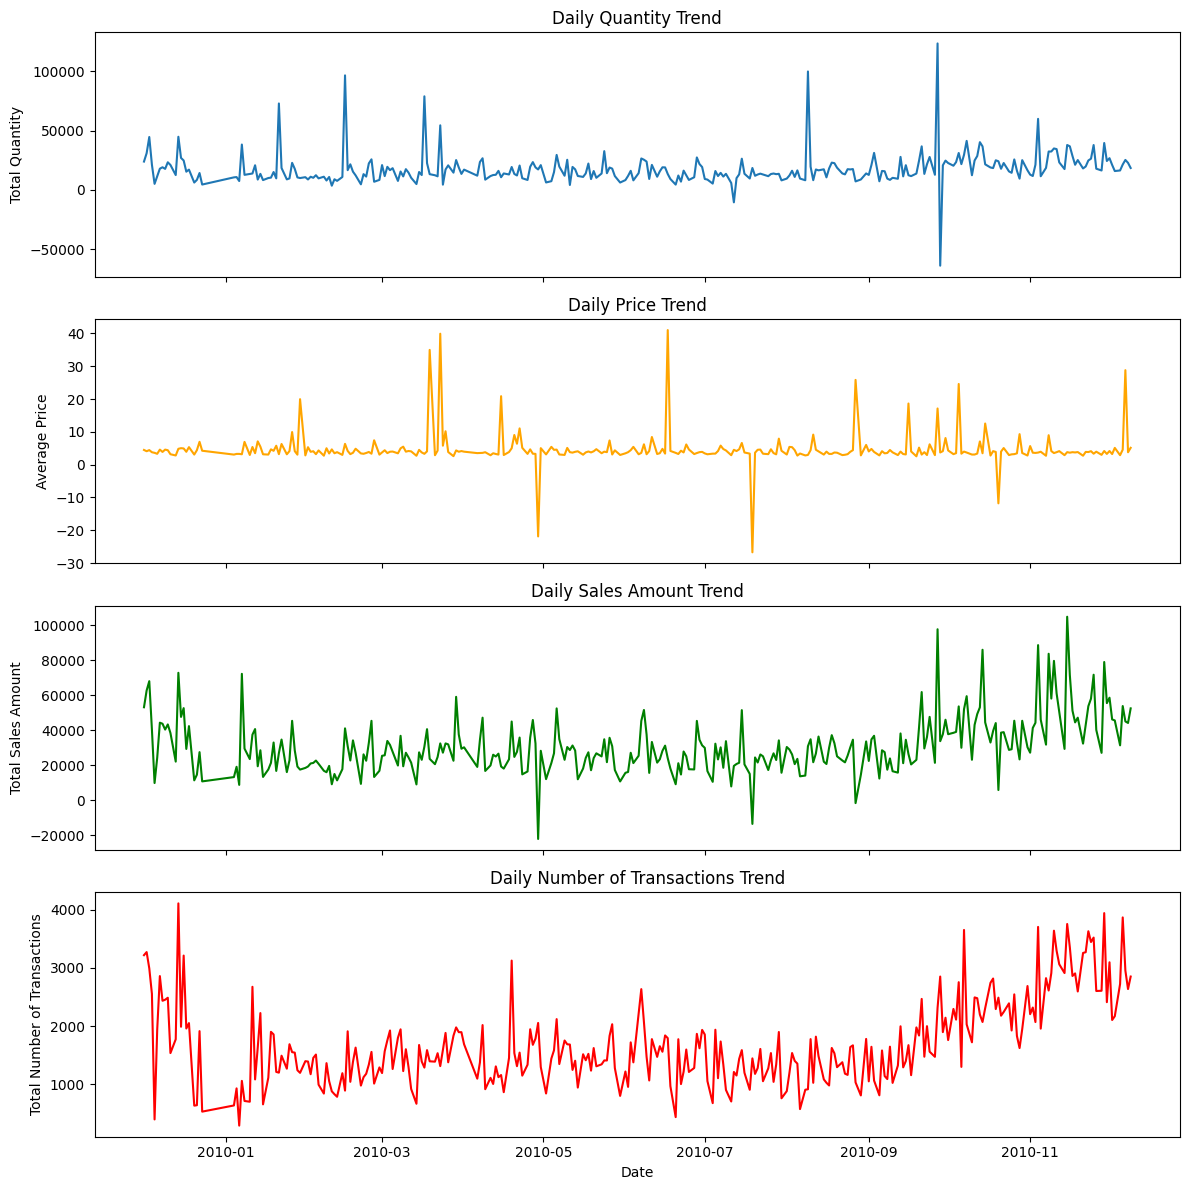

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axes[0].plot(daily_purchase_trend.index, daily_purchase_trend['Quantity'])
axes[0].set_ylabel('Total Quantity')
axes[0].set_title('Daily Quantity Trend')

axes[1].plot(daily_purchase_trend.index, daily_purchase_trend['Price'], color='orange')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Daily Price Trend')

axes[2].plot(daily_purchase_trend.index, daily_purchase_trend['SalesAmount'], color='green')
axes[2].set_ylabel('Total Sales Amount')
axes[2].set_title('Daily Sales Amount Trend')

axes[3].plot(daily_purchase_trend.index, daily_purchase_trend['Transactions'], color='red')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Number of Transactions')
axes[3].set_title('Daily Number of Transactions Trend')

plt.tight_layout()
plt.show()

* Except for certain points that appear to be outliers, **quantity** and **price** seem to consistently maintain a certain level. -> Conduct additional analysis to identify the cause of the outliers.
* On the other hand, **sales amount** and **number of transactions** continue to fluctuate while appearing to follow a certain trend. -> Decompose the data into trend, seasonality, and residual components.

In [64]:
# Conduct additional analysis to identify the cause of the outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.index

outliers_quantity_date = detect_outliers_iqr(daily_purchase_trend, "Quantity")
outliers_price_date = detect_outliers_iqr(daily_purchase_trend, "Price")

outliers = purchase_trend_df[(purchase_trend_df['InvoiceDate'].isin(outliers_quantity_date)) | (purchase_trend_df['InvoiceDate'].isin(outliers_price_date))]
outliers

,Customer ID,Invoice,Description,Quantity,Price,Country,InvoiceDate,InvoiceTime,SalesAmount
6500,12779,489895,PARTY CONE CHRISTMAS DECORATION,12,0.85,Poland,2009-12-03,07:25:00,10.20
6501,12779,489895,SET OF 3 CASES WOODLAND DESIGN,2,5.95,Poland,2009-12-03,07:25:00,11.90
6502,12779,489895,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,Poland,2009-12-03,07:25:00,30.00
6503,12779,489895,CERAMIC CAKE DESIGN SPOTTED MUG,24,1.49,Poland,2009-12-03,07:25:00,35.76
6504,12779,489895,FAIRY CAKE CERAMIC BUTTER DISH,6,2.95,Poland,2009-12-03,07:25:00,17.70
...,...,...,...,...,...,...,...,...,...
519918,-1,537666,FRYING PAN UNION FLAG,3,8.47,United Kingdom,2010-12-07,18:36:00,25.41
519919,-1,537666,FOUR HOOK WHITE LOVEBIRDS,2,4.21,United Kingdom,2010-12-07,18:36:00,8.42
519920,-1,537666,LOVEBIRD HANGING DECORATION WHITE,3,1.66,United Kingdom,2010-12-07,18:36:00,4.98
519921,-1,537666,HANGING HEART MIRROR DECORATION,3,1.28,United Kingdom,2010-12-07,18:36:00,3.84


In [65]:
outliers_date_group = outliers.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'Invoice': 'count'})
outliers_date_group

,Quantity,Price,Invoice
InvoiceDate,,,
2009-12-03,44569,4.438961,2994
2009-12-14,44780,4.834991,4109
2009-12-22,14240,6.967693,1916
2010-01-07,38230,3.176234,1062
2010-01-08,12708,6.945509,717
2010-01-13,8739,7.103987,1633
2010-01-21,72824,3.204156,1203
2010-01-26,22799,9.942849,1555
2010-01-29,10007,19.972368,1200


Extracted only the dates that were considered outliers, but could not identify specific reasons such as a sale period, a holiday, or a significant increase or decrease in purchase.

C:\Users\ShinJiyoon\AppData\Local\Temp\ipykernel_33072\2310275953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Membership'] = outliers['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')


<Axes: xlabel='InvoiceDate', ylabel='Price'>

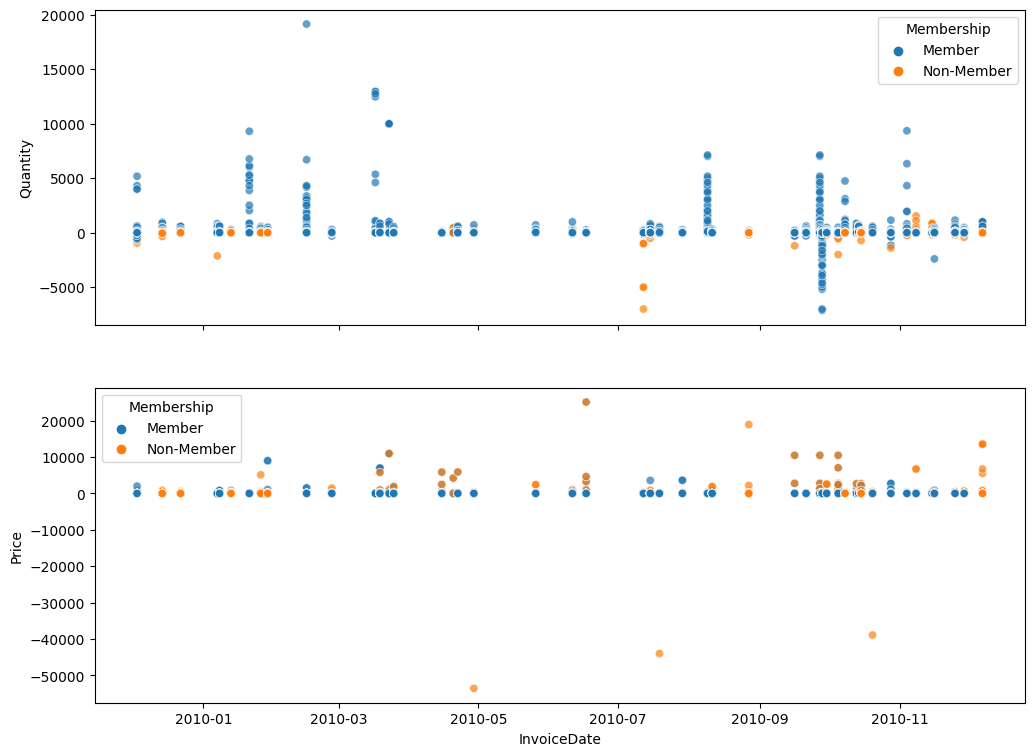

In [70]:
outliers['Membership'] = outliers['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')

fig, axes = plt.subplots(2, 1, figsize=(12, 9), sharex=True)
sns.scatterplot(ax=axes[0], x=outliers['InvoiceDate'], y=outliers['Quantity'], hue=outliers['Membership'], alpha=0.7)
sns.scatterplot(ax=axes[1], x=outliers['InvoiceDate'], y=outliers['Price'], hue=outliers['Membership'], alpha=0.7)

* Visualized the outliers in quantity and price using the time series graph, distinguishing between members and non-members.
    * Fluctuations in quantity were greater among members, while fluctuations in price were more pronounced among non-members. Therefore, it is likely that outliers in quantity resulted from members making bulk purchases or refunds at specific points of time, whereas outliers in price may have been caused by non-members purchasing or refunding expensive items at certain times.

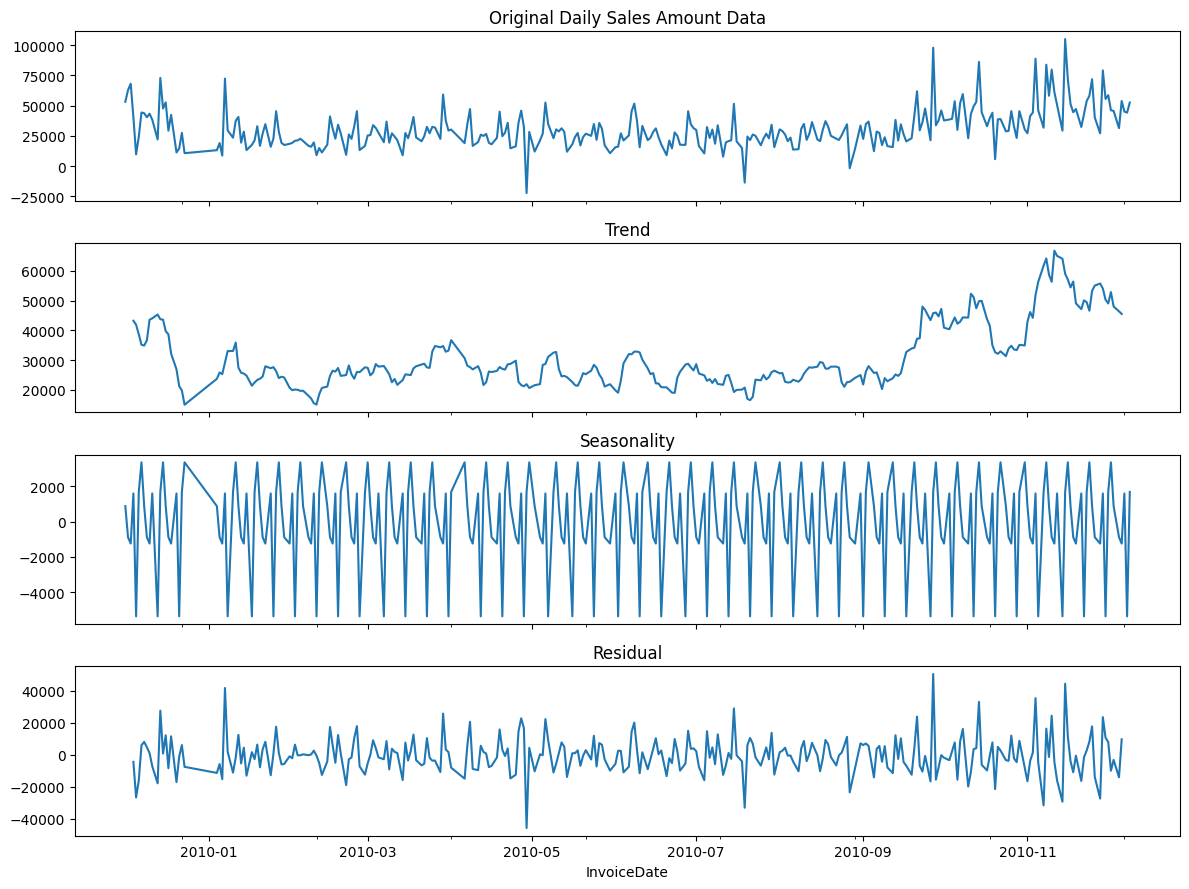

In [ ]:
# Decompose sales amount data into trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_sales_amount = seasonal_decompose(daily_purchase_trend['SalesAmount'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_sales_amount.observed.plot(ax=axes[0], title='Original Daily Sales Amount Data')
decomposed_sales_amount.trend.plot(ax=axes[1], title='Trend')
decomposed_sales_amount.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_sales_amount.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* In the trend graph, an upward pattern appears toward the later stages. This indicates a long-term increase in sales amount.
* In the seasonality graph, a repeating pattern is observed with a period of 7. This suggests a weekly cycle.

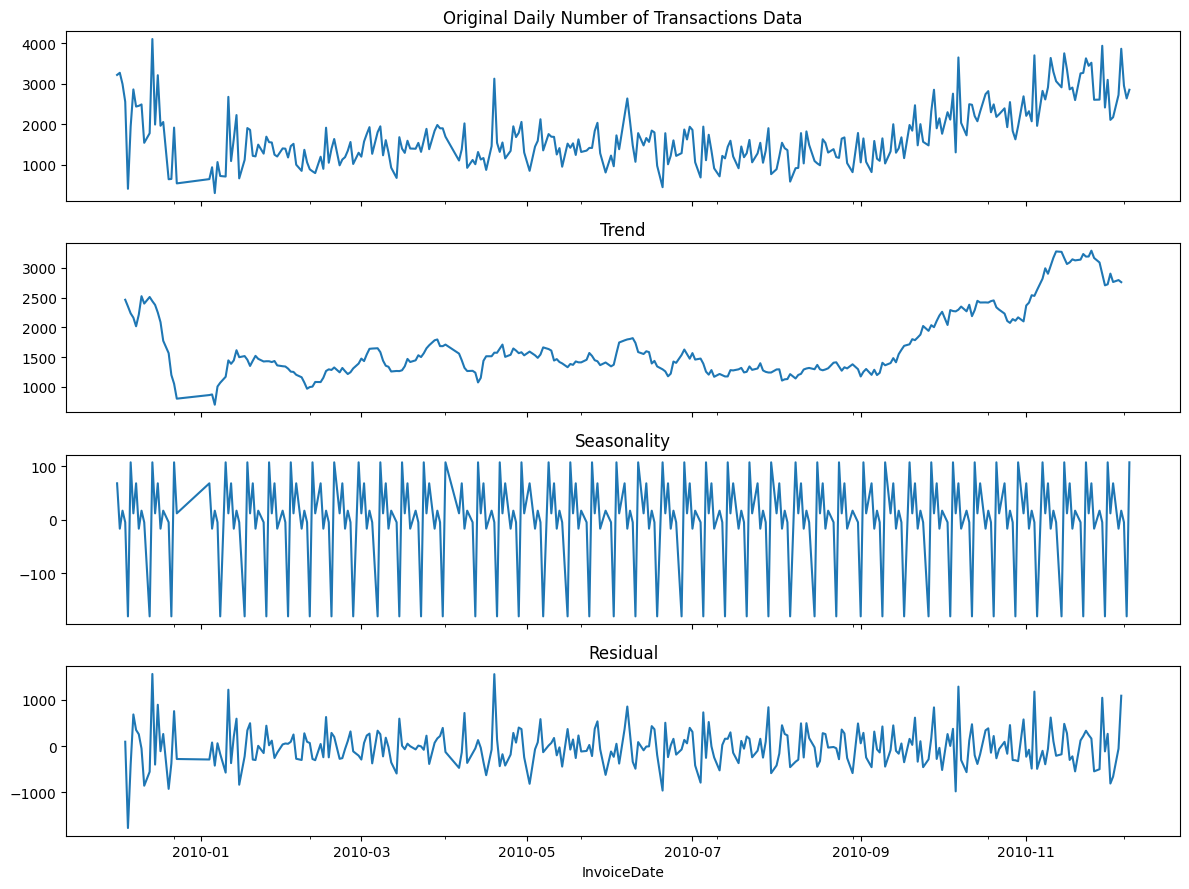

In [17]:
decomposed_transactions = seasonal_decompose(daily_purchase_trend['Transactions'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_transactions.observed.plot(ax=axes[0], title='Original Daily Number of Transactions Data')
decomposed_transactions.trend.plot(ax=axes[1], title='Trend')
decomposed_transactions.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_transactions.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* Like the previous graph, the number of transactions also shows a long-term increasing trend. The increase in both sales amount and transaction amount suggests business growth.
* Seasonality also shows a recurring 7-day pattern. It is likely that both sales amount and transaction count increased on weekends, but this needs to be verified.

<Axes: xlabel='DayOfWeek'>

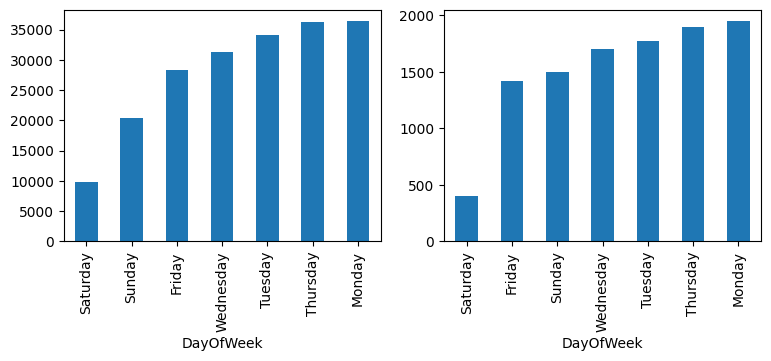

In [18]:
daily_purchase_trend['DayOfWeek'] = pd.to_datetime(daily_purchase_trend.index).day_name()

fig, axes = plt.subplots(1, 2, figsize=(9, 3))
daily_purchase_trend.groupby('DayOfWeek')['SalesAmount'].mean().sort_values().plot(ax=axes[0], kind='bar')
daily_purchase_trend.groupby('DayOfWeek')['Transactions'].mean().sort_values().plot(ax=axes[1], kind='bar')

Contrary to expectations, both sales amount and transaction count are lowest on Saturday (weekend) and highest on Monday (weekday).
* A quick look at the data shows that some customers make large purchases at once, suggesting that this business likely has many B2B customers. As a result, purchases may be more active on weekdays.

##### Purchase Volume by Country

In [19]:
country_purchase_trend = purchase_trend_df.groupby('Country').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
country_purchase_trend = country_purchase_trend.sort_values(by='SalesAmount', ascending=False)
country_purchase_trend = country_purchase_trend.rename(columns={'Invoice': 'Transactions'})
country_purchase_trend

,Quantity,Price,SalesAmount,Transactions
Country,,,,
United Kingdom,4491080,4.571017,8194777.533,482924
EIRE,188704,7.948114,352242.730,9670
Netherlands,181823,3.311910,263863.410,2769
Germany,107133,3.677999,196290.351,8129
France,74471,4.189418,130769.900,5772
Sweden,52238,7.653093,51213.510,902
Denmark,227030,2.642383,46972.950,428
Switzerland,22053,4.411281,43343.410,1187
Spain,18332,6.186244,37084.900,1278


<Axes: xlabel='Country'>

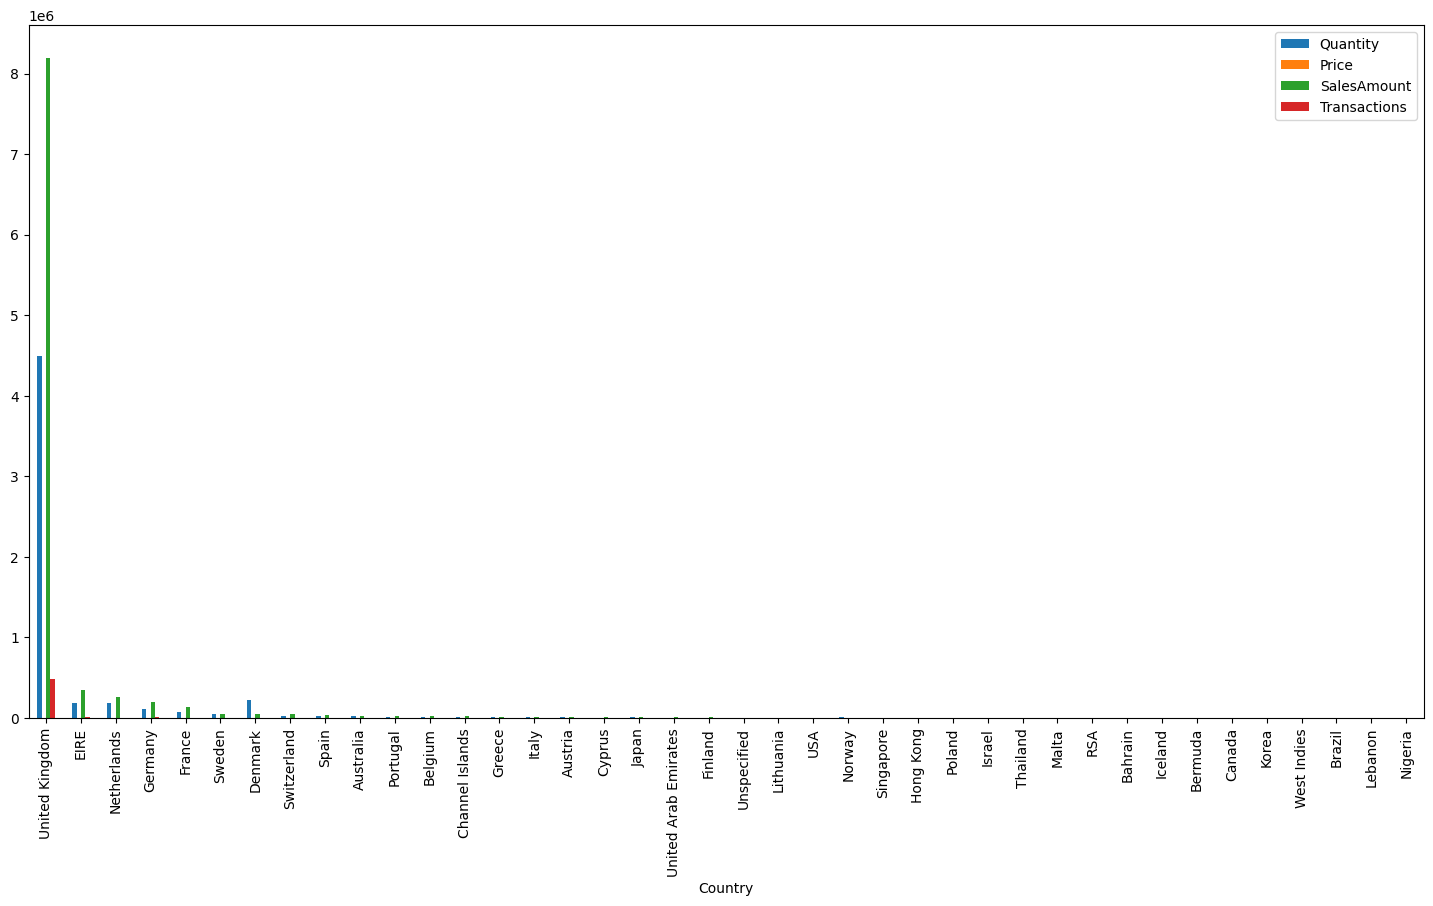

In [20]:
country_purchase_trend.plot(kind='bar', figsize=(18, 9))

* This graph is difficult to analyze

In [21]:
country_product_quantity = purchase_trend_df.groupby(['Country', 'Description'])['Quantity'].sum().unstack().fillna(0)
country_product_quantity

Description,21494,22467,22719,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,...,wet & rotting,wet and rotting,wet cartons,wet ctn,wet damages,wet/smashed/unsellable,wonky bottom/broken,wrong code,wrong ctn size,wrong invc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bahrain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Channel Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cyprus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


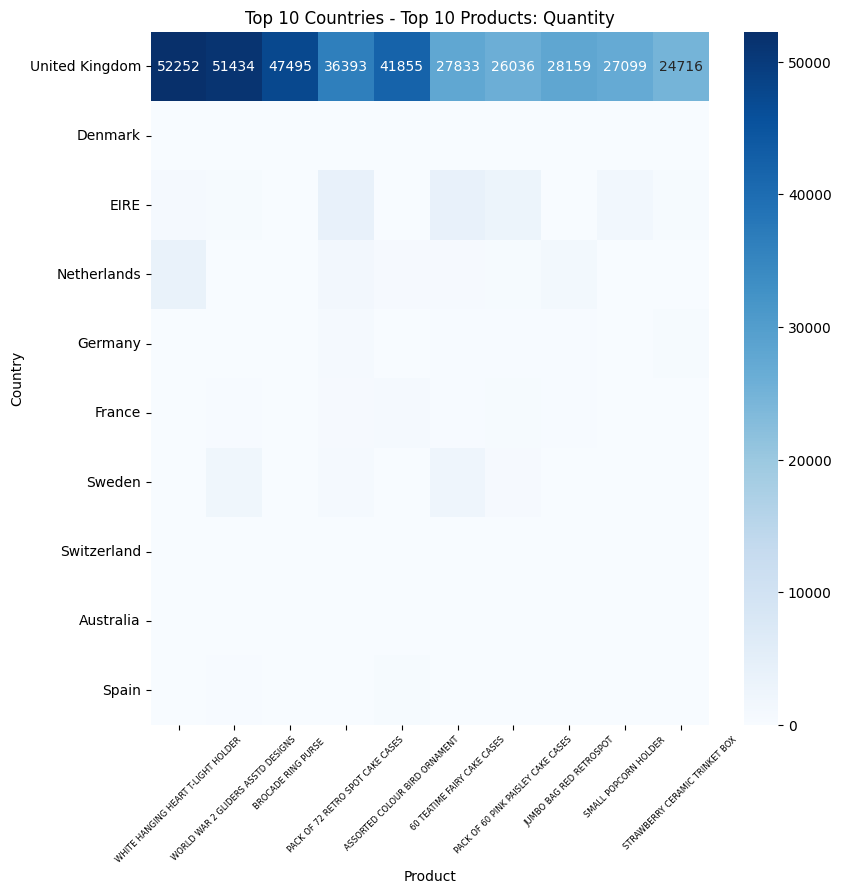

In [22]:
# Create a heatmap displaying only the top 10 countries and the top 10 products based on purchase volume.

top_products = country_product_quantity.sum().nlargest(10).index
top_countries = country_product_quantity.sum(axis=1).nlargest(10).index
filtered_data = country_product_quantity.loc[top_countries, top_products]

plt.figure(figsize=(9, 9))

import seaborn as sns
sns.heatmap(filtered_data, cmap="Blues", annot=True, fmt=".0f")

plt.title("Top 10 Countries - Top 10 Products: Quantity")
plt.xlabel("Product")
plt.ylabel("Country")
plt.xticks(rotation=45, fontsize=6)
plt.show()

* The United Kingdom has an overwhelmingly high purchase volume. This suggests that the online retail purchase service primarily targets the United Kingdom.

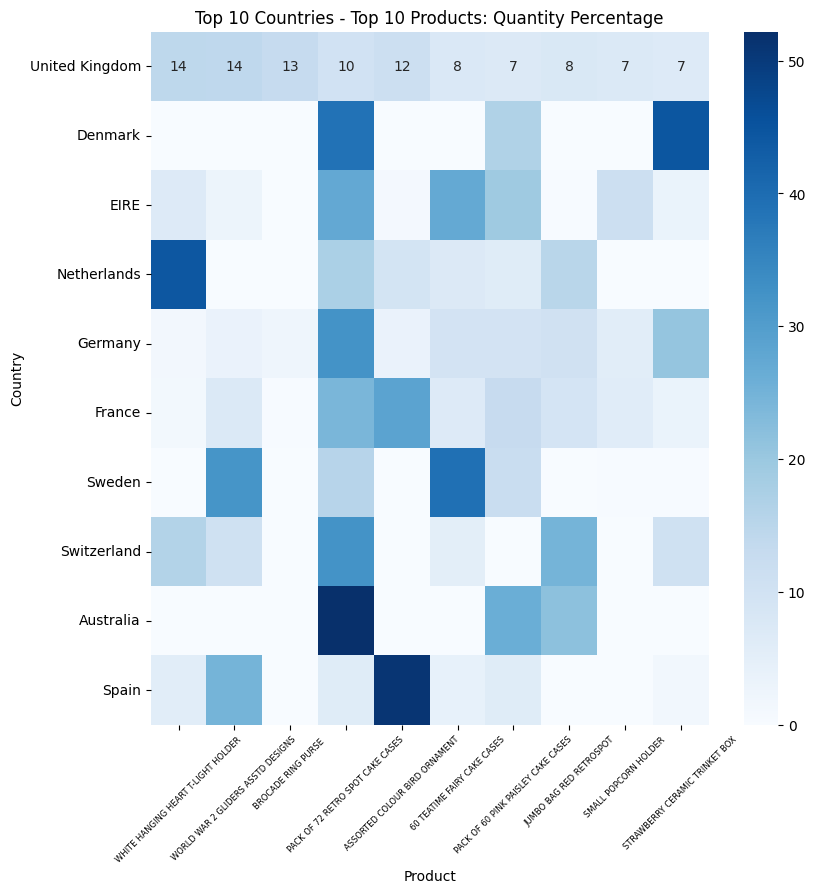

In [23]:
# Since the previous graph did not reveal the top purchased products in other countries,
# Create another heatmap showing the proportion of product quantity by country.

filtered_data_percentage = filtered_data.div(filtered_data.sum(axis=1), axis=0)*100

plt.figure(figsize=(9, 9))

sns.heatmap(filtered_data_percentage, cmap="Blues", annot=True, fmt=".0f")

plt.title("Top 10 Countries - Top 10 Products: Quantity Percentage")
plt.xlabel("Product")
plt.ylabel("Country")
plt.xticks(rotation=45, fontsize=6)
plt.show()

* The United Kingdom, identified as the largest market, does not concentrate purchases on specific products.
* In contrast, other countries show distinct purchasing patterns. For example, Australia primarily purchases the fourth product, pack of 72 retro spot cake cases, while buying very few other products. For such countries, targeted promotions on their preferred products could potentially increase sales.

### Case Study: United Kingdom's purchase trend analysis

To gain deeper insights,
**Further analyze the United Kingdom market, the largest one which exhibits a purchasing pattern of buying a wide range of items evenly.**

In [24]:
purchase_trend_UK = purchase_trend_df[purchase_trend_df['Country']=="United Kingdom"]
purchase_trend_UK = purchase_trend_UK.drop(columns='Country')
purchase_trend_UK

,Customer ID,Invoice,Description,Quantity,Price,InvoiceDate,InvoiceTime,SalesAmount
0,13085,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01,07:45:00,83.40
1,13085,489434,PINK CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00
2,13085,489434,WHITE CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00
3,13085,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01,07:45:00,100.80
4,13085,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01,07:45:00,30.00
...,...,...,...,...,...,...,...,...
525456,17530,538171,FELTCRAFT DOLL ROSIE,2,2.95,2010-12-09,20:01:00,5.90
525457,17530,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,2010-12-09,20:01:00,3.75
525458,17530,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,2010-12-09,20:01:00,3.75
525459,17530,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,2010-12-09,20:01:00,7.50


Since more than 4/5 of the data comes from the UK, it is reasonable to analyze the UK data alone. While UK buyers may not fully represent global customers, focusing on a single country avoids potential distortions caused by unique characteristics of other countries.

##### Daily purchase trend of UK

In [25]:
daily_purchase_trend_UK = purchase_trend_UK.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Price': 'mean', 'SalesAmount': 'sum', 'Invoice': 'count'})
daily_purchase_trend_UK = daily_purchase_trend_UK.rename(columns={'Invoice': 'Transactions'})
daily_purchase_trend_UK

,Quantity,Price,SalesAmount,Transactions
InvoiceDate,,,,
2009-12-01,20600,4.502075,46692.71,2950
2009-12-02,26638,4.115459,55871.42,3213
2009-12-03,44230,4.457975,67340.80,2903
2009-12-04,19768,3.756896,37828.33,2439
2009-12-05,4722,3.432826,9042.36,368
...,...,...,...,...
2010-12-05,13604,2.850409,25462.20,2493
2010-12-06,20648,4.557088,52402.84,3809
2010-12-07,24035,29.785597,42301.48,2846


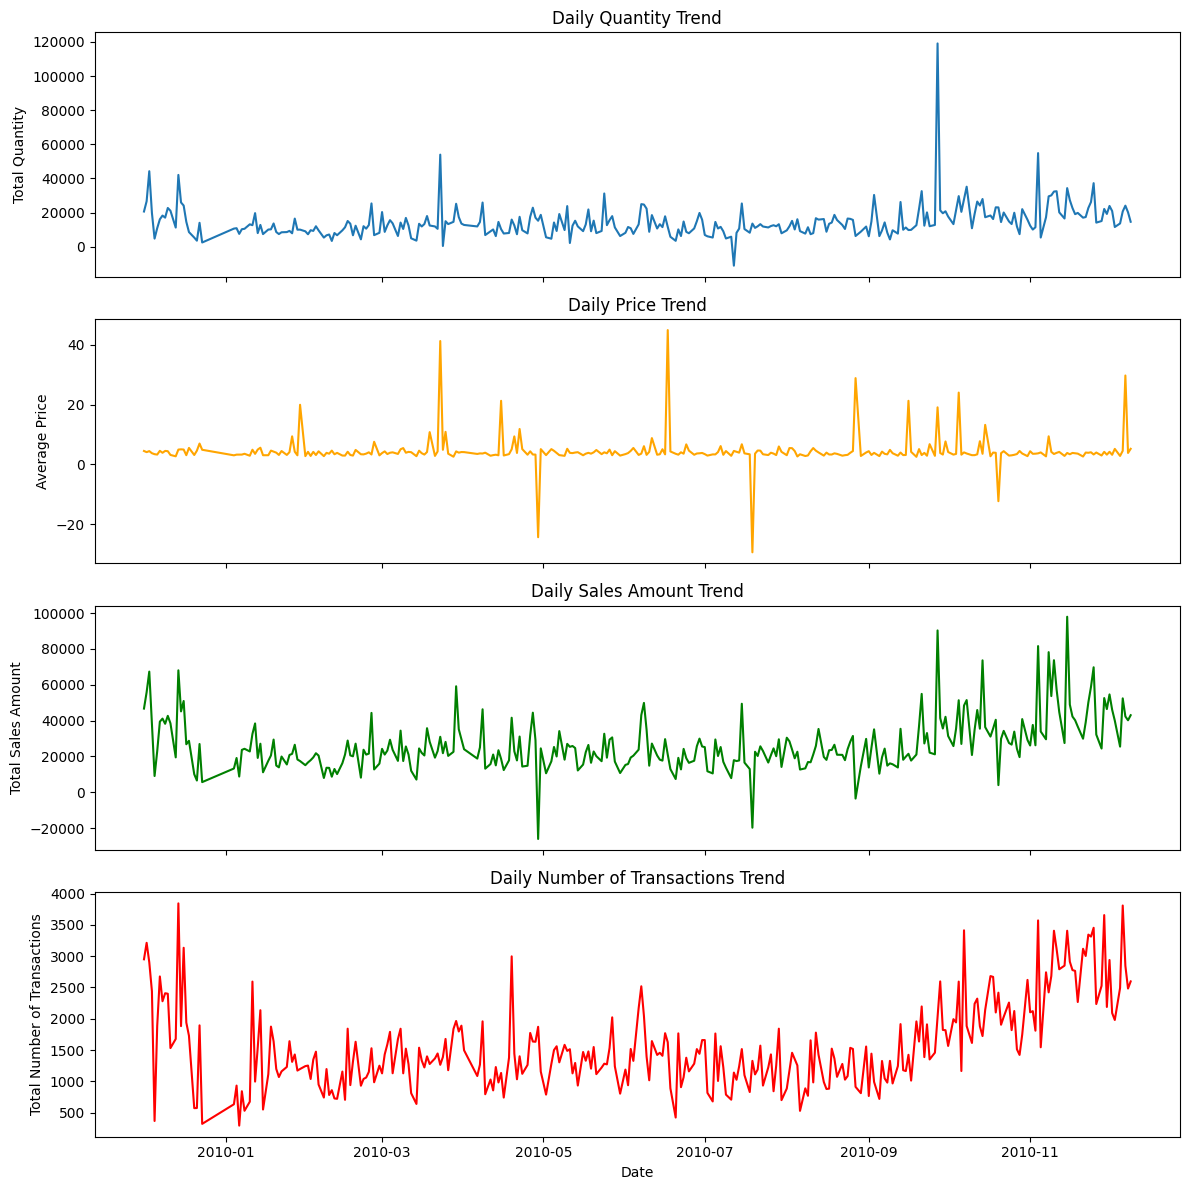

In [26]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axes[0].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Quantity'])
axes[0].set_ylabel('Total Quantity')
axes[0].set_title('Daily Quantity Trend')

axes[1].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Price'], color='orange')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Daily Price Trend')

axes[2].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['SalesAmount'], color='green')
axes[2].set_ylabel('Total Sales Amount')
axes[2].set_title('Daily Sales Amount Trend')

axes[3].plot(daily_purchase_trend_UK.index, daily_purchase_trend_UK['Transactions'], color='red')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Number of Transactions')
axes[3].set_title('Daily Number of Transactions Trend')

plt.tight_layout()
plt.show()

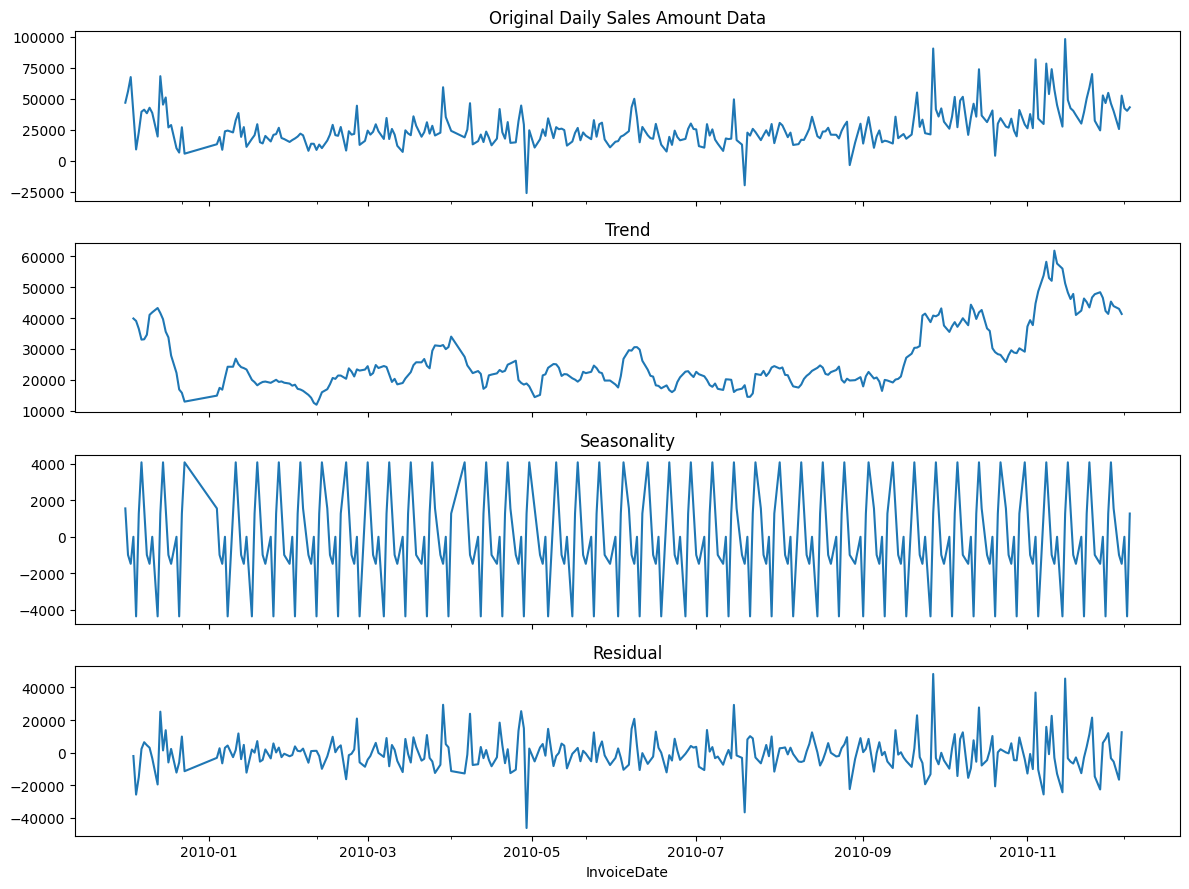

In [27]:
decomposed_sales_amount_UK = seasonal_decompose(daily_purchase_trend_UK['SalesAmount'], model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)
decomposed_sales_amount_UK.observed.plot(ax=axes[0], title='Original Daily Sales Amount Data')
decomposed_sales_amount_UK.trend.plot(ax=axes[1], title='Trend')
decomposed_sales_amount_UK.seasonal.plot(ax=axes[2], title='Seasonality')
decomposed_sales_amount_UK.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

* The graph shows a pattern similar to the one observed in the overall data. This suggests that the analyses conducted on the entire dataset can also be applied to the UK market.

##### Compare customer with and without membership

In [71]:
retail_UK = purchase_trend_UK.copy()
retail_UK['Membership'] = retail_UK['Customer ID'].apply(lambda x: 'Non-Member' if x==-1 else 'Member')
retail_UK = retail_UK.drop(columns='Customer ID')
retail_UK

,Invoice,Description,Quantity,Price,InvoiceDate,InvoiceTime,SalesAmount,Membership
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,2009-12-01,07:45:00,83.40,Member
1,489434,PINK CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00,Member
2,489434,WHITE CHERRY LIGHTS,12,6.75,2009-12-01,07:45:00,81.00,Member
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,2009-12-01,07:45:00,100.80,Member
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,2009-12-01,07:45:00,30.00,Member
...,...,...,...,...,...,...,...,...
525456,538171,FELTCRAFT DOLL ROSIE,2,2.95,2010-12-09,20:01:00,5.90,Member
525457,538171,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,2010-12-09,20:01:00,3.75,Member
525458,538171,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,2010-12-09,20:01:00,3.75,Member
525459,538171,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,2010-12-09,20:01:00,7.50,Member


In [72]:
retail_UK['Membership'].value_counts()

Membership
Member        379423
Non-Member    103501
Name: count, dtype: int64

* Members outnumber Non-members by approximately 3.67 times.
    * The proportion of members in the overall data is overwhelmingly high, suggesting a member-centric business model.
    * If non-members are new customers, it is necessary to consider strategies for converting them into members.

In [73]:
membership_summary = retail_UK.groupby('Membership').agg({'Quantity': 'mean', 'Price': 'mean', 'SalesAmount': 'mean'})
membership_summary

,Quantity,Price,SalesAmount
Membership,,,
Member,11.451517,3.653249,18.550667
Non-Member,1.411687,7.935452,11.171176


* The average purchase quantity for Members is more than eight times higher than that of Non-members.  -> Members tend to make bulk purchases, suggesting a high likelihood of being business customers.
* Non-members have a significantly higher average unit price.  -> Non-members tend to purchase higher-priced products.

------
**A strategic approach would be to offer bulk purchase promotions to Members and recommendation system for premium products to Non-members.**

##### Create RFM feature 
- R recency: the customers recent purchase date ~ present
- F frequency: the customers purchasing frequency 
- M momnetary: the customers order $ amount in total
- others features can be appended for more effective customer analysis (e.g. coupon usage, puchasing item spectrum, etc.)

# dddd

--------
* purchase trend comparison: ***anonymous customer v. registered customer***

In [29]:
retail_member = retail_sp[['InvoiceDate', 'Quantity', 'Price', 'Customer ID']]

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore') # ^0^ 
    retail_member['sales_amount'] = retail_member['Quantity'] * retail_member['Price']
    retail_member['InvoiceDate'] = retail_member['InvoiceDate'].dt.date
    retail_member['membership'] = retail_member['Customer ID'].apply(lambda x: 'membership' if x>= 0 else 'non-membership')

m_quantity_by_date = retail_member.groupby(['InvoiceDate', 'membership'])['Quantity'].sum().reset_index()
m_sales_amount_by_date = retail_member.groupby(['InvoiceDate', 'membership'])['sales_amount'].sum().reset_index()

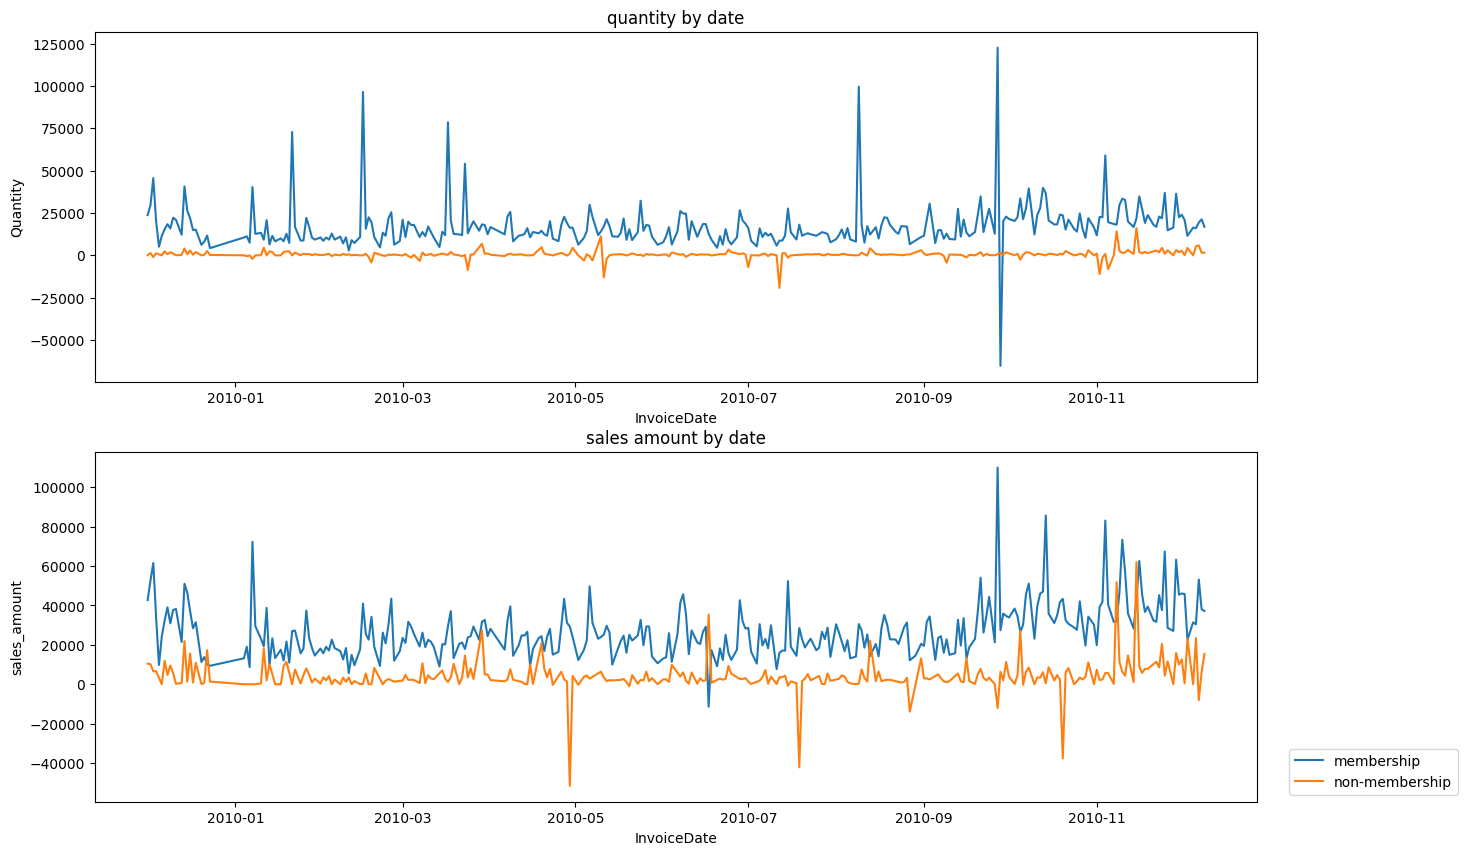

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=m_quantity_by_date, x='InvoiceDate', y='Quantity', hue='membership', ax=axes[0])
axes[0].set_title('quantity by date')
sns.lineplot(data=m_sales_amount_by_date, x='InvoiceDate', y='sales_amount', hue='membership', ax=axes[1])
axes[1].set_title('sales amount by date')

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1.1, 0), loc='lower center')

plt.show()

In [31]:
retail_member['membership'].value_counts()

membership
membership        417534
non-membership    104999
Name: count, dtype: int64

* considering the fact that we have enough amount of data for each party, registered customers'purchase >>>> that of anonymous customers 

### 1.2 data preprocessing

* objective: To cluster customers who have been actively purchasing in the United Kingdom and identify the main products ordered by each customer segment 
* extract only member customers whose purchase country is the United Kingdom, excluding cancellations and returns.

In [32]:
# purchase from the United Kingdom
retail_sp = retail_sp[retail_sp['Country']=='United Kingdom']

# only registered customers
retail_sp = retail_sp[retail_sp['Customer ID']>0]

# exclude returns and cancels
retail_sp = retail_sp[retail_sp['Price']>0]
retail_sp = retail_sp[retail_sp['Quantity']>0]

retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


##### create M feature
monetary = sales amount = quantity * price

In [33]:
retail_sp['sales_amount'] = retail_sp['Quantity'] * retail_sp['Price']

##### create RFM index

In [34]:
rfm = {
    'InvoiceDate': 'max',
    'Invoice': 'count',
    'sales_amount': 'sum'
}

cust_df = retail_sp.groupby('Customer ID').agg(rfm)
cust_df

,InvoiceDate,Invoice,sales_amount
Customer ID,,,
12346,2010-06-28 13:53:00,33,372.86
12608,2010-10-31 10:49:00,16,415.79
12745,2010-08-10 10:14:00,22,723.85
12746,2010-06-17 10:41:00,17,254.55
12747,2010-12-05 15:38:00,154,5080.53
...,...,...,...
18283,2010-11-22 15:30:00,230,641.77
18284,2010-10-04 11:33:00,28,461.68
18285,2010-02-17 10:24:00,12,427.00


##### create R feature
recency = invoicedate - present 

In [35]:
max(retail_sp['InvoiceDate']) # take this into account when deciding the present date

Timestamp('2010-12-09 20:01:00')

set the present date as 1/1/2011

In [36]:
cust_df['Recency'] = cust_df['InvoiceDate'] - dt.datetime(2011, 1, 1)

# time spent -> day + 1
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)

cust_rfm = cust_df[['Invoice', 'sales_amount', 'Recency']]
cust_rfm.rename(columns={'Invoice': 'Frequency', 'sales_amount': 'Monetary'}, inplace=True)

cust_rfm

C:\Users\ShinJiyoon\AppData\Local\Temp\ipykernel_33072\486605910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_rfm.rename(columns={'Invoice': 'Frequency', 'sales_amount': 'Monetary'}, inplace=True)


,Frequency,Monetary,Recency
Customer ID,,,
12346,33,372.86,-186
12608,16,415.79,-61
12745,22,723.85,-143
12746,17,254.55,-197
12747,154,5080.53,-26
...,...,...,...
18283,230,641.77,-39
18284,28,461.68,-88
18285,12,427.00,-317


### 1.4 Clustering utilizing the RFM feature 

##### RFM feature

In [37]:
cust_rfm.head()

,Frequency,Monetary,Recency
Customer ID,,,
12346,33,372.86,-186
12608,16,415.79,-61
12745,22,723.85,-143
12746,17,254.55,-197
12747,154,5080.53,-26


##### data scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()
scaled = mns.fit_transform(cust_rfm)
rfm_scaled = pd.DataFrame(data=scaled, columns=cust_rfm.columns)
rfm_scaled.head()

,Frequency,Monetary,Recency
0,0.006347,0.001059,0.560322
1,0.002975,0.001182,0.895442
2,0.004165,0.002065,0.675603
3,0.003173,0.000721,0.530831
4,0.030345,0.014542,0.989276


##### K-means clustering modeling

In [39]:
sil_coef = []

from sklearn.metrics import silhouette_score
for i in range(2, 11):
    kmeans_sil = KMeans(n_clusters=i, random_state=111)
    kmeans_sil.fit(rfm_scaled)
    score = silhouette_score(cust_rfm, kmeans_sil.labels_)
    sil_coef.append(score)

plt.plot(range(2, 11), sil_coef)
plt.xticks(range(2, 11))
plt.show()

NameError: name 'KMeans' is not defined

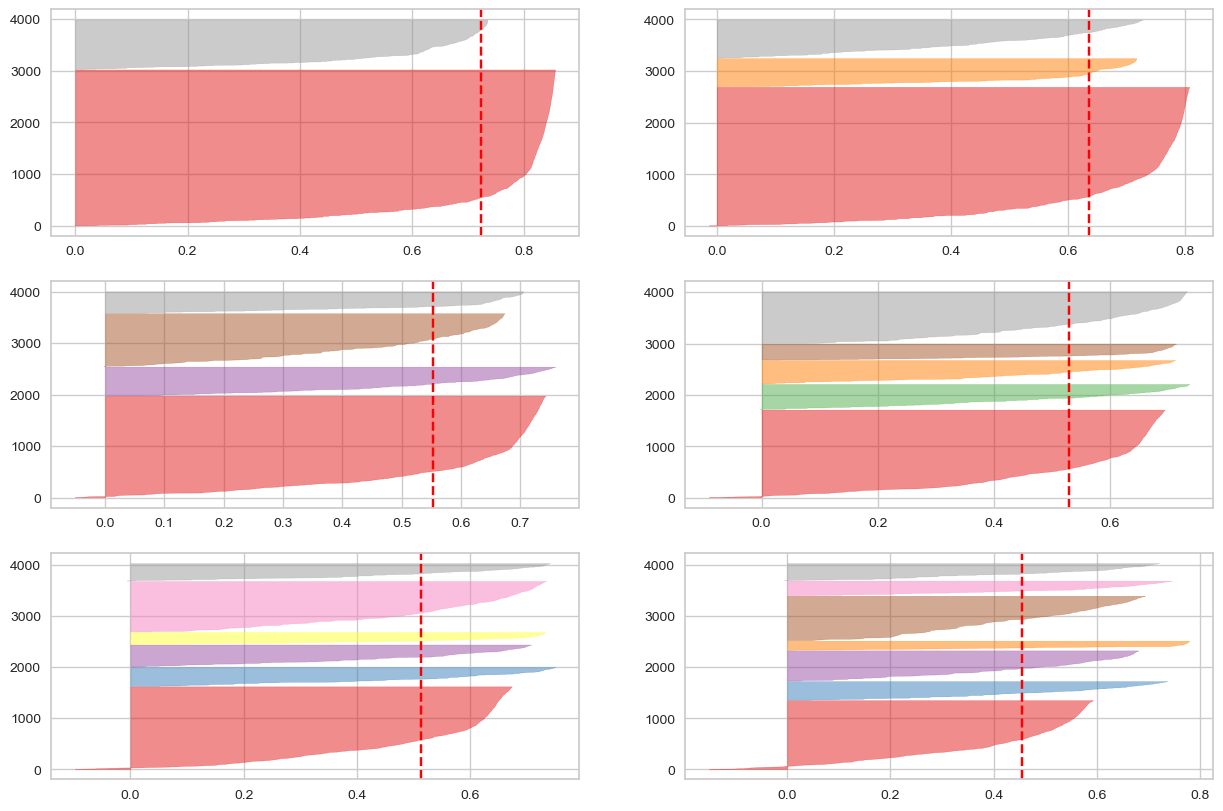

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2, 8):
    kmeans_sil = KMeans(n_clusters=i, random_state=111)
    q, mod = divmod(i, 2)
    visual = SilhouetteVisualizer(kmeans_sil, ax=ax[q-1][mod])
    visual.fit(rfm_scaled)

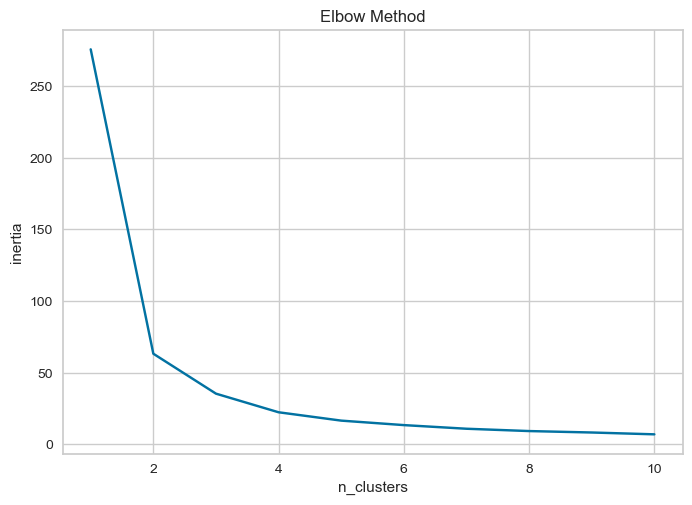

In [ ]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(rfm_scaled)
    inertia_list.append(kmeans.inertia_) # The sum of the squares of the distances from each point to the centroid of the cluster.

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show() 

The most appropriate value for \( k \) appears to be 3. The silhouette score plot (first image) shows a significant drop after \( k = 3 \), indicating that clusters are well-separated and compact at this point. The silhouette visualization (second image) supports this as the clusters appear somewhat distinct and well-formed for \( k = 3 \). Lastly, the elbow method plot (third image) demonstrates a clear "elbow" at \( k = 3 \), suggesting that the additional clusters beyond this point do not significantly reduce the sum of squared distances within clusters. Thus, \( k = 3 \) balances compactness and separation optimally.


In [ ]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=111)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=111)

### 1.5 merge the prediction to the existing dataframe 

In [ ]:
cust_rfm['cluster_kn'] = kmeans.fit_predict(cust_rfm)
cust_rfm

,Frequency,Monetary,Recency,cluster_kn
Customer ID,,,,
12346,33,372.86,-186,2
12608,16,415.79,-61,2
12745,22,723.85,-143,2
12746,17,254.55,-197,2
12747,154,5080.53,-26,2
...,...,...,...,...
18283,230,641.77,-39,2
18284,28,461.68,-88,2
18285,12,427.00,-317,2


In [ ]:
import numpy as np
retail_sp['cluster_kn'] = np.nan

for ID, cluster in zip(cust_rfm.index, cust_rfm['cluster_kn']):
    retail_sp.loc[retail_sp['Customer ID']==ID, 'cluster_kn'] = cluster
    
retail_sp['cluster_kn'] = retail_sp['cluster_kn'].astype(int)
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales_amount,cluster_kn
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,2
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom,3.75,2
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,2


In [ ]:
retail_sp['cluster_kn'].value_counts()

cluster_kn
2    349177
0     21125
1       627
Name: count, dtype: int64

### 1.6 analysis for each cluster

In [ ]:
cluster_agg = {'Customer ID': 'count',
               'Quantity': ['sum', 'mean', 'std'],
               'Price': ['mean', 'std'],
               'sales_amount': ['mean', 'std'],
               'InvoiceDate': 'max'
               }

cluster_stats = retail_sp.groupby('cluster_kn').agg(cluster_agg)

cluster_stats.columns = ['count', 'quantity_sum', 'quantity_mean', 'quantity_std', 'price_mean', 'price_std', 'sales_amount_mean', 'sales_amount_std', 'date_max']

cluster_stats

,count,quantity_sum,quantity_mean,quantity_std,price_mean,price_std,sales_amount_mean,sales_amount_std,date_max
cluster_kn,,,,,,,,,
0,21125,904068,42.796118,215.114475,3.101343,61.877172,60.160725,203.790893,2010-12-09 17:27:00
1,627,124216,198.111643,173.177097,3.491930,4.728798,556.880941,580.590511,2010-12-09 13:44:00
2,349177,3420289,9.795287,42.970794,3.147450,27.566789,16.595298,45.419960,2010-12-09 20:01:00


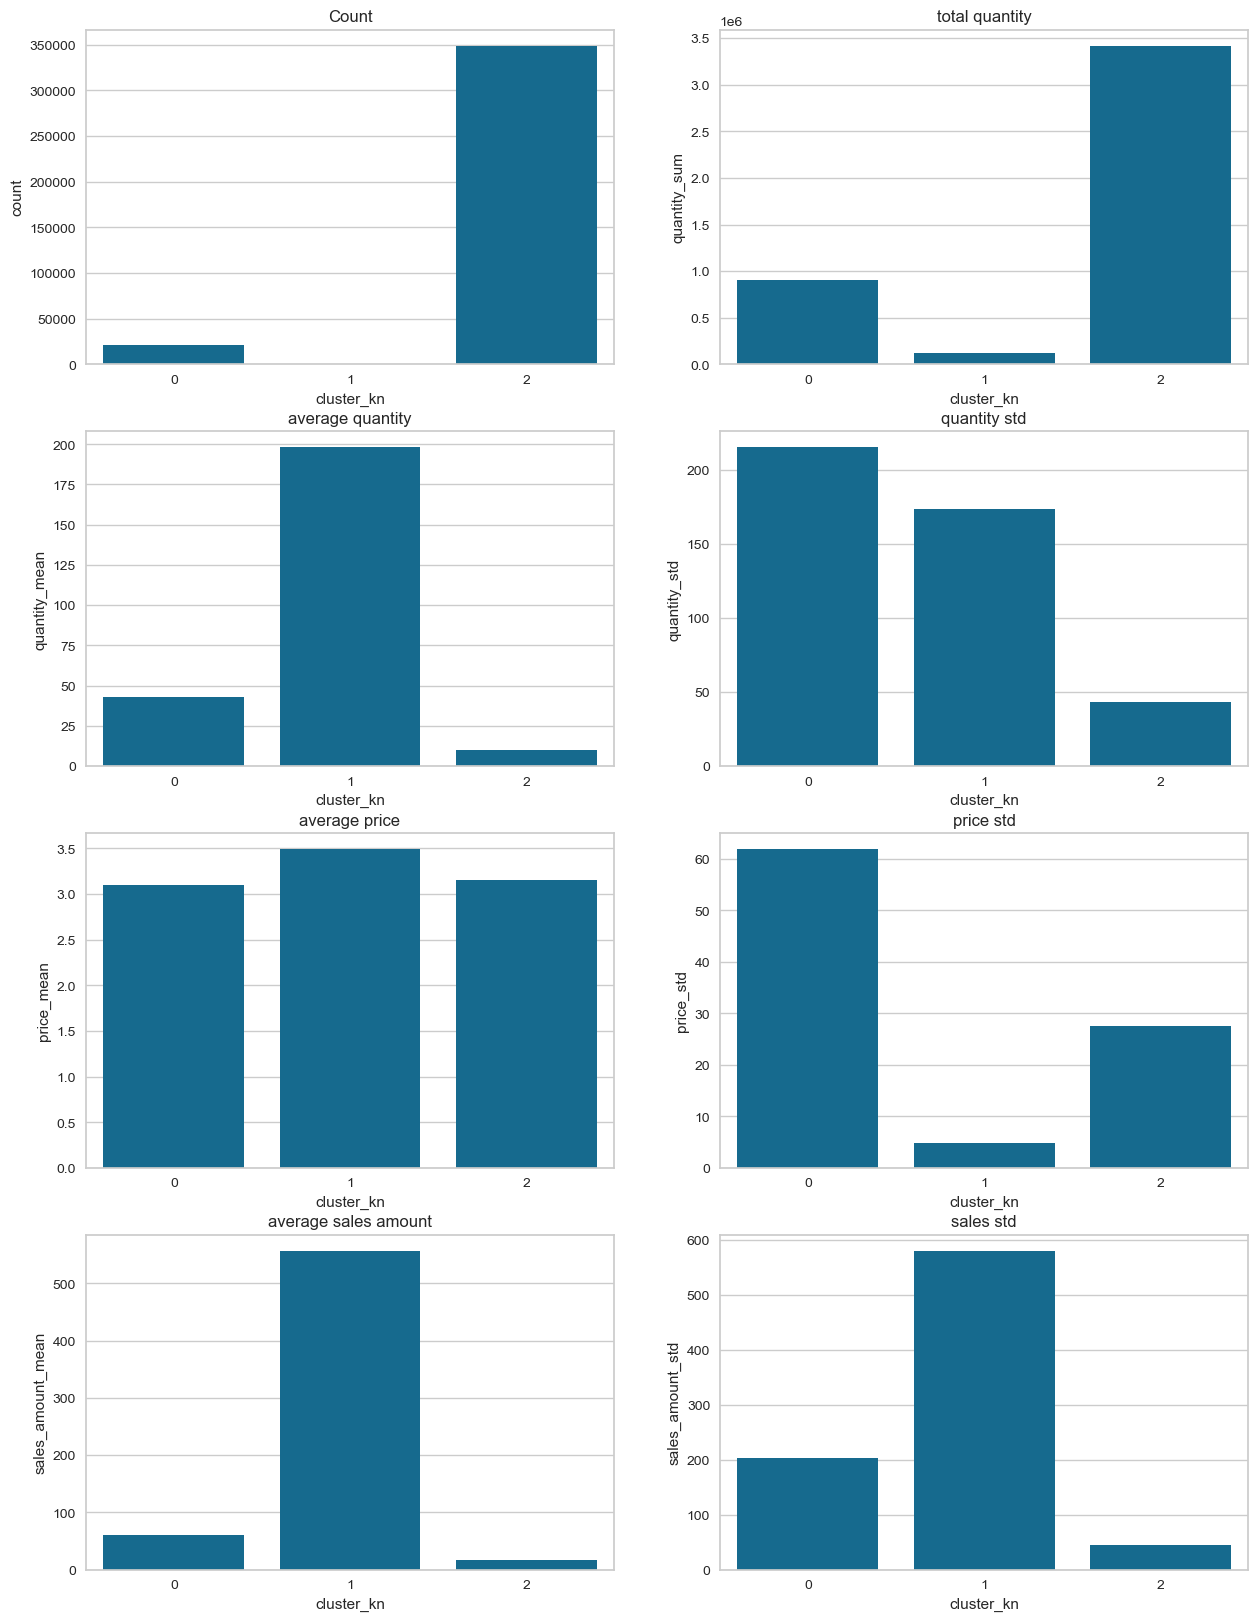

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
sns.barplot(x=cluster_stats.index, y='count', data=cluster_stats, ax=axes[0, 0])
axes[0, 0].set_title('Count')
sns.barplot(x=cluster_stats.index, y='quantity_sum', data=cluster_stats, ax=axes[0, 1])
axes[0, 1].set_title('total quantity')
sns.barplot(x=cluster_stats.index, y='quantity_mean', data=cluster_stats, ax=axes[1, 0])
axes[1, 0].set_title('average quantity')
sns.barplot(x=cluster_stats.index, y='quantity_std', data=cluster_stats, ax=axes[1, 1])
axes[1, 1].set_title('quantity std')
sns.barplot(x=cluster_stats.index, y='price_mean', data=cluster_stats, ax=axes[2, 0])
axes[2, 0].set_title('average price')
sns.barplot(x=cluster_stats.index, y='price_std', data=cluster_stats, ax=axes[2, 1])
axes[2, 1].set_title('price std')
sns.barplot(x=cluster_stats.index, y='sales_amount_mean', data=cluster_stats, ax=axes[3, 0])
axes[3, 0].set_title('average sales amount')
sns.barplot(x=cluster_stats.index, y='sales_amount_std', data=cluster_stats, ax=axes[3, 1])
axes[3, 1].set_title('sales std')

plt.subplots_adjust(hspace=0.2)

plt.show()

when we take the count and avg quantity tables into account,the customers in the group index 1 tend to utilize their membership very frequently.
the other statistics, however, hardly represent any crucial insights. Therefore, we need to check specific stats for rfm index as well.

purchase trend analysis per cluster (serial analysis)

In [ ]:
retail_sp.loc[:, 'InvoiceDate'] = retail_sp['InvoiceDate'].dt.date

c_quantity_by_date = retail_sp.groupby(['InvoiceDate', 'cluster_kn'])['Quantity'].sum().reset_index()
c_sales_amount_by_date = retail_sp.groupby(['InvoiceDate', 'cluster_kn'])['sales_amount'].sum().reset_index()

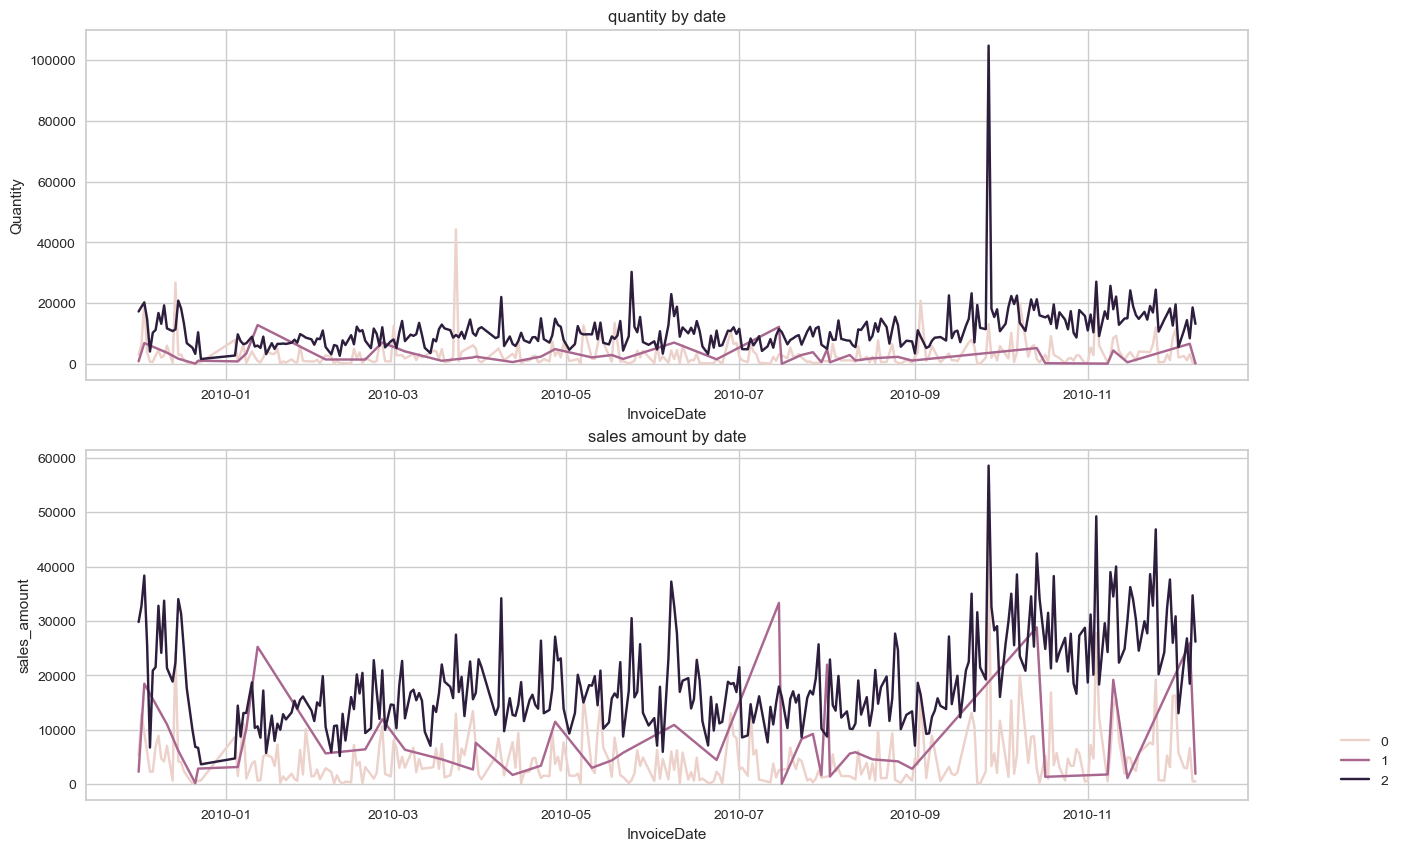

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=c_quantity_by_date, x='InvoiceDate', y='Quantity', hue='cluster_kn', ax=axes[0])
axes[0].set_title('quantity by date')
sns.lineplot(data=c_sales_amount_by_date, x='InvoiceDate', y='sales_amount', hue='cluster_kn', ax=axes[1])
axes[1].set_title('sales amount by date')

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1.1, 0), loc='lower center')

plt.show()

the most sold items per cluster

In [ ]:
description = retail_sp.groupby('cluster_kn')['Description'].apply(
    lambda x: np.unique(x)[np.argmax(np.unique(x, return_counts=True)[1])]
)

pd.DataFrame(description)

,Description
cluster_kn,
0,WHITE HANGING HEART T-LIGHT HOLDER
1,BLACK HEART CARD HOLDER
2,WHITE HANGING HEART T-LIGHT HOLDER


* most cluster tended to buy white hanging heart t-light holder: Let's check the top 5 most sold items!

In [ ]:
cluster_product_counts = retail_sp.groupby('cluster_kn')['Description'].value_counts()
top5_products_by_cluster = cluster_product_counts.groupby(level=0).nlargest(5)

pd.DataFrame(top5_products_by_cluster)

count
cluster_kn cluster_kn Description                              
0          0          WHITE HANGING HEART T-LIGHT HOLDER    202
                      WOODEN FRAME ANTIQUE WHITE            152
                      WOODEN PICTURE FRAME WHITE FINISH     145
                      WOOD S/3 CABINET ANT WHITE FINISH     129
                      WOOD 2 DRAWER CABINET WHITE FINISH    126
1          1          BLACK HEART CARD HOLDER                16
                      CREAM HEART CARD HOLDER                14
                      VINTAGE UNION JACK MEMOBOARD           11
                      WOOD BLACK BOARD ANT WHITE FINISH      10
                      HOME SWEET HOME MUG                     8
2          2          WHITE HANGING HEART T-LIGHT HOLDER   2846
                      REGENCY CAKESTAND 3 TIER             1449
                      STRAWBERRY CERAMIC TRINKET BOX       1247
                      ASSORTED COLOUR BIRD ORNAMENT        1217
                      REX CASH+CARRY JUMBO SHOPPER         1175

we can see each cluster has its only taste for the purchasing item, even though 2 of all clusters have shown their most interets in the white hanging heart t-light holder.

### 1.7 statistics for the RFM index 

In [ ]:
cluster_agg = {'Frequency': ['count', 'mean', 'std'],
               'Monetary': ['mean', 'std'],
               'Recency': ['min', 'max', 'mean', 'std']
               }

rfm_stats = cust_rfm.groupby('cluster_kn').agg(cluster_agg)

rfm_stats

Frequency                               Monetary                \
               count       mean          std           mean           std   
cluster_kn                                                                  
0                 26  812.50000  1082.373845   48880.589269  24591.753999   
1                  1  627.00000          NaN  349164.350000           NaN   
2               3942   88.57864   151.303145    1469.988912   2380.911652   

           Recency                             
               min max        mean        std  
cluster_kn                                     
0             -102 -22  -31.884615  15.870292  
1              -22 -22  -22.000000        NaN  
2             -395 -22 -112.647641  97.166099

cluster index 1 is found to be the "outlier"

tbc...